In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cubedsphere as cs

## Plot vertical average

48 20;48 160;384 20;384 160;

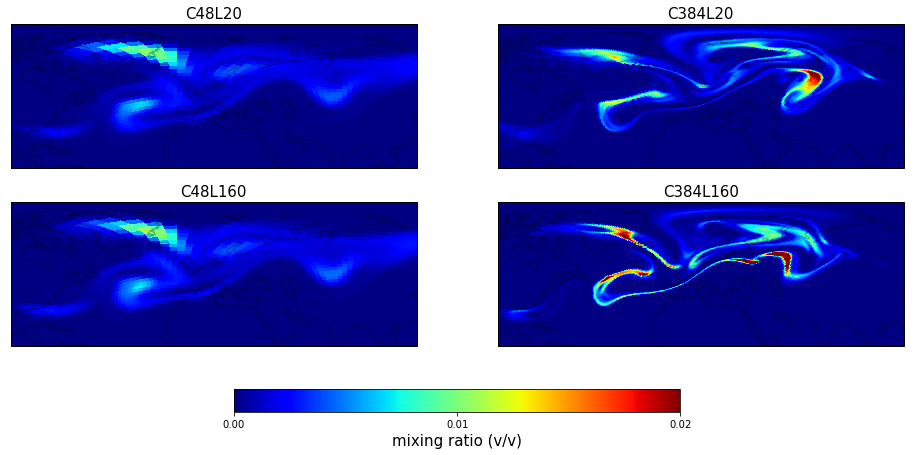

In [23]:
datadir = '~/FV3/output/processed/vertical_mean/'

vmin,vmax = [0,0.02]
#Vres_list = [20,40,80,160]
#Hres_list = [48,96,192,384]

Vres_list = [20, 160]
Hres_list = [48, 384]

fig, axes = plt.subplots(len(Vres_list),len(Hres_list),figsize=[16,8],
                         subplot_kw=dict(projection=ccrs.PlateCarree()))

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        print(Hres,Vres,end=';')
        
        try:
            ds = xr.open_dataset(datadir+'plume01_vmean_C{0}L{1}.nc'.format(Hres,Vres),decode_times=False)
        except:
            print('fail to open')
            
        dr = ds['plume01']; #print('max:',dr.max().values)
        
        ax = axes[j][i]
        ax.coastlines(alpha=0.3)

        im = cs.plotCS( dr, ds, ax,
                       vmin=vmin, vmax=vmax, cmap='jet')

        ax.set_ylim([10,88]);ax.set_xlim([-100,120])
        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=15)     

# provide a list of axes to let the colorbar span all those axes
fig.colorbar(im, ax=axes.ravel().tolist(), pad=0.1, orientation='horizontal',
             shrink=0.5,ticks=np.linspace(vmin,vmax,3)).\
             set_label("mixing ratio (v/v)",fontsize=15)

#fig.tight_layout()

fig.savefig('plume01_vertical_average_2x2plot.png',dpi=400)

## plot zonal average

48 20;48 160;384 20;384 160;

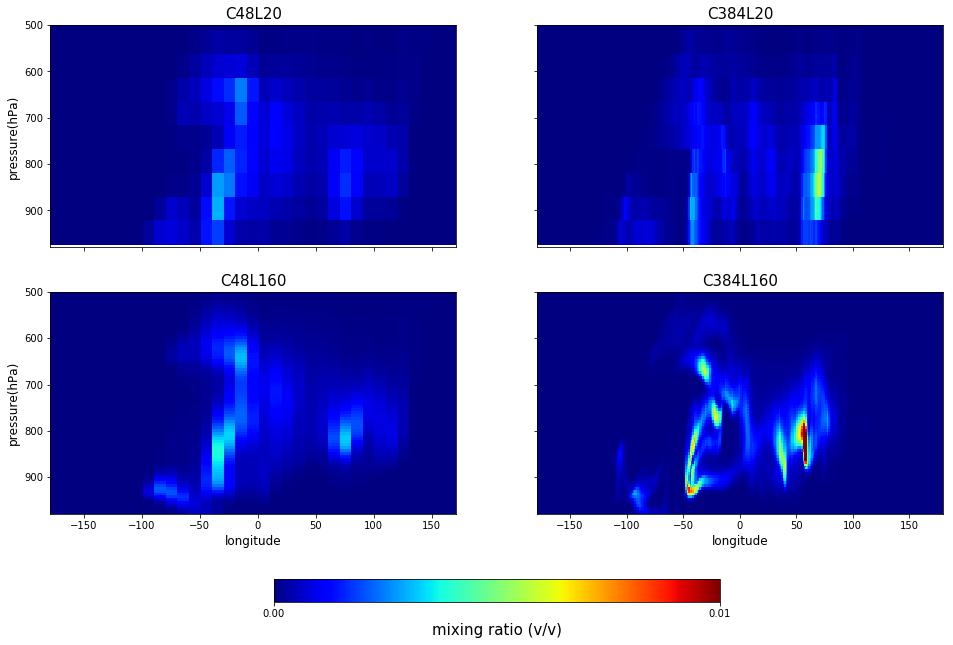

In [22]:
datadir = '~/FV3/output/processed/meri_mean/'

vmin,vmax = [0,0.02]
#Vres_list = [20,40,80,160]
#Hres_list = [48,96,192,384]

Vres_list = [20, 160]
Hres_list = [48, 384]

fig, axes = plt.subplots(len(Vres_list),len(Hres_list),figsize=[16,12])

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        print(Hres,Vres,end=';')
        
        try:
            dr = xr.open_dataarray(datadir+'plume01_meri_C{0}L{1}.nc'.format(Hres,Vres),decode_times=False)
            lon_bins = dr['lon_bins'].copy().values - 180.0
            pfull = dr['pfull'].copy().values
            dr = dr.roll(lon_bins=-dr.shape[1]//2)
            data = dr.values
        except:
            print('fail to open')
        
        ax = axes[j][i]

        im = ax.pcolormesh(lon_bins,pfull,data,cmap='jet',vmax=0.01,vmin=0)

        ax.set_ylim([980,500])
        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=15)   
        
        if Hres == 48:
            ax.set_ylabel('pressure(hPa)',fontsize=12)
        else:
            ax.yaxis.set_ticklabels([])
            
        if Vres == 160:
            ax.set_xlabel('longitude',fontsize=12)
        else:
            ax.xaxis.set_ticklabels([])

# provide a list of axes to let the colorbar span all those axes
fig.colorbar(im, ax=axes.ravel().tolist(), pad=0.1, orientation='horizontal',
             shrink=0.5,ticks=np.linspace(vmin,vmax,3)).\
             set_label("mixing ratio (v/v)",fontsize=15)

#fig.tight_layout()

fig.savefig('plume01_meri_average_2x2plot.png',dpi=200)